In [1]:
import os
from osgeo import gdal
import geopandas as gpd

import valenspy as vp
from valenspy._utilities import load_yml
from valenspy.processing.select import select_point
from valenspy.diagnostic.functions import mean_bias, mean_absolute_error, root_mean_square_error, spearman_correlation, perkins_skill_score, time_series_spatial_mean
from valenspy.diagnostic.visualizations import *
from valenspy.processing.regrid import *
from pathlib import Path

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import percentileofscore
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.cm
import math



# define machine name - used for paths of (observational) datasets
machine = 'hortense'

manager = vp.InputManager(machine=machine)

ModuleNotFoundError: No module named 'osgeo'

## General analysis of output

In [3]:
ucl_dir = '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/fiens/UCL/'
cclm_dir = '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/'

In [4]:
#file = os.listdir(urbclim_dir)[0]
file_max = ucl_dir + "UrbClimOutput/" + 'UrbClim_Belgium_CCLM_2019072216_T2M.tif'
file_min = ucl_dir + "UrbClimOutput/"+ 'UrbClim_Belgium_CCLM_2019072305_T2M.tif'

In [5]:
brussel_shape = ucl_dir + "Brussel_STATBEL.gpkg"

## Functions

## Calculations

In [6]:
# READ max Data
handle = gdal.Open(file_max)
var_max = handle.ReadAsArray()

# read geo info from svf geotiff
gt = handle.GetGeoTransform()
proj = handle.GetProjection()
driver = gdal.GetDriverByName("GTiff")
[cols,rows]=var_max.shape
dxy=gt[1]
xlow=gt[0]
ylow=gt[3]
xcor = xlow + np.arange(cols) * dxy
ycor = ylow + np.arange(rows) * dxy

masked_array = np.ma.array(var_max, mask=np.isnan(var_max))
masked_array = np.ma.masked_values(masked_array, value=0.0)

NameError: name 'gdal' is not defined

In [ ]:
# READ min Data
handle = gdal.Open(file_min)
var_min = handle.ReadAsArray()

# read geo info from svf geotiff
gt = handle.GetGeoTransform()
proj = handle.GetProjection()
driver = gdal.GetDriverByName("GTiff")
[cols,rows]=var_min.shape
dxy=gt[1]
xlow=gt[0]
ylow=gt[3]
xcor = xlow + np.arange(cols) * dxy
ycor = ylow + np.arange(rows) * dxy

# masked_array = np.ma.array(var_min, mask=np.isnan(var_min))
# masked_array = np.ma.masked_values(masked_array, value=0.0)

In [ ]:
file = gpd.read_file(brussel_shape)

In [ ]:
var_diff = var_max - var_min
masked_array = np.ma.array(var_diff, mask=file)
masked_array = np.ma.masked_values(masked_array, value=0.0)

MaskError: Mask and data not compatible: data size is 6087399, mask size is 22.

In [ ]:
var_diff

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0, 0.5, 'Latitude')

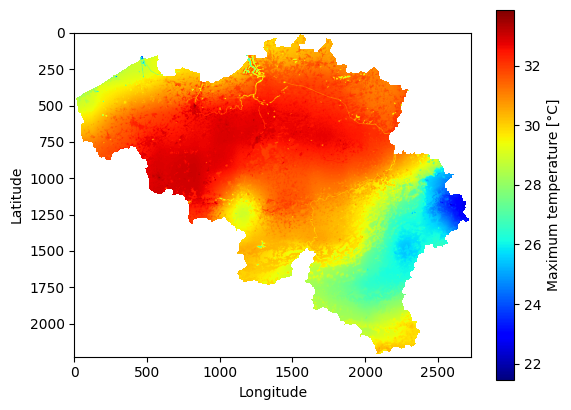

In [ ]:
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.)

plt.imshow(masked_array,cmap = cmap)
plt.colorbar(label = "Maximum temperature [°C]")
plt.xlabel('Longitude')
plt.ylabel('Latitude')


In [ ]:
handle.replace(0, np.nan(), inplace = True)